# Calculate the same SST Indices but instead use a different climatology

In [1]:
import sys
sys.path.append(sys.path[0]+'/../..')


import helpers.fileHandler as fh
import utils.sstIndex as sst
import utils._indexDefinitions as _index

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cftime
import xarray

In [3]:
indexNames = list(_index.sstIndex.keys())
indexNames.append('dmi')

Load the model outputs, but drop all the variables we don't care about

First load up the cvdp and figure out the details of the index we want to calculate

In [4]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '005')

cvdp = cvdp.rename_vars({'indian_ocean_dipole':'dmi'})


Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.005.cvdp_data.850-2005.nc']


In [5]:
experimentDs = fh.loadModelData('CESM-LME', 'SST', '005',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t', 'ULAT', 'ULONG') )

Files imported: 
 ['/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.170001-179912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.120001-129912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.090001-099912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.130001-139912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.185001-200512.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.160001-169912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.110001-119912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.180001-184912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.140001-149912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.085001-089912.nc', '

Load the ds to use for climatology

In [6]:
controlDs = fh.loadModelData('CESM-LME', 'SST', '0850cntl.001',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t', 'ULAT', 'ULONG') )

Files imported: 
 ['/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.120001-129912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.170001-179912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.090001-099912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.160001-169912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.185001-200512.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.130001-139912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.180001-184912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.140001-149912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.110001-119912.nc', '/Users/ajs/CMIP5-

Calculate the indeces from the model outputs

In [7]:
climatDs = sst.calculateClimatology(controlDs, 850, 2005)


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(sl

In [8]:
climatDs

{'nino12': <xarray.DataArray 'SST' (month: 12, nlat: 37, nlon: 8)>
 dask.array<stack, shape=(12, 37, 8), dtype=float32, chunksize=(1, 37, 8), chunktype=numpy.ndarray>
 Coordinates:
     TLAT     (nlat, nlon) float64 dask.array<chunksize=(37, 8), meta=np.ndarray>
     TLONG    (nlat, nlon) float64 dask.array<chunksize=(37, 8), meta=np.ndarray>
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
 Dimensions without coordinates: nlat, nlon,
 'nino3': <xarray.DataArray 'SST' (month: 12, nlat: 38, nlon: 54)>
 dask.array<stack, shape=(12, 38, 54), dtype=float32, chunksize=(1, 38, 54), chunktype=numpy.ndarray>
 Coordinates:
     TLAT     (nlat, nlon) float64 dask.array<chunksize=(38, 54), meta=np.ndarray>
     TLONG    (nlat, nlon) float64 dask.array<chunksize=(38, 54), meta=np.ndarray>
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
 Dimensions without coordinates: nlat, nlon,
 'nino34': <xarray.DataArray 'SST' (month: 12, nlat: 38, nlon: 45)>
 dask.array<stack, shape=(12, 38, 45),

In [9]:
%time


indexDs = sst.calculateIndex(experimentDs, climatDs) #based on 850 to 2005 climatology per CVDP

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value en

Do a comparison plot. Between calculated indexes and cvdp

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


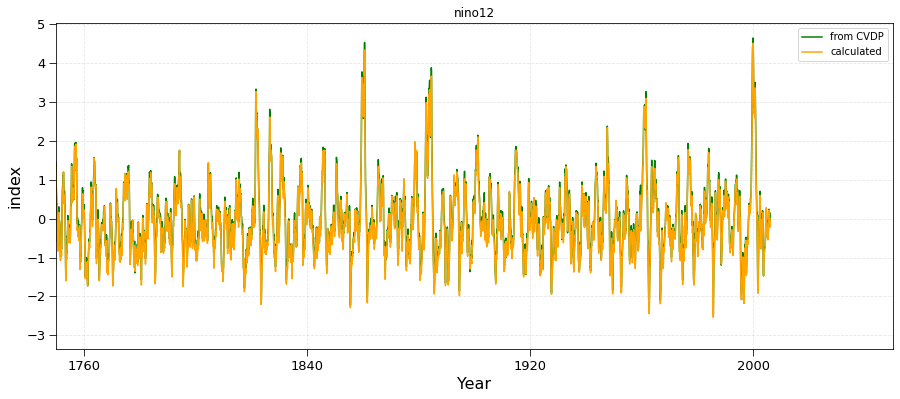

In [ ]:
%time



for keys in indexNames:
    
    try:
        #test if this is an index in cvdp
        cvdp[keys]

    except:
        print (keys, " not defined in Cvdp")        
        
    else:
        #plot
        
        #load into memory so it doesn't get loaded twice if we want to use it later
        #indexDs[keys].load()
        
        # set-up plot
        fig = plt.figure(figsize=(15,6))
        ax = fig.add_subplot(1, 1, 1)
        
        #plot the cvdp
        cvdp[keys].plot(color='green' ,label='from CVDP')
                
        #plot the calculated one
        indexDs[keys].plot(color='orange',label='calculated')
        
        #set the horizontal axis to something nice
        plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(2050,1,1))

        #add axis names and title
        plt.title(keys)
        plt.ylabel("index", fontsize=16)  
        plt.xlabel("Year", fontsize=16)

        #make it neat
        plt.tick_params(which = 'minor', labelsize=13, length=4)
        plt.tick_params(which = 'major', labelsize=13, length=7)
        ax.grid(which='major', alpha=0.3, linestyle='dashed')

        #show the legend based on the 'labels' set above
        plt.legend()

        #make it so
        plt.show()

        print(keys, " standard deviation of difference: ", (indexDs[keys]-cvdp[keys]).std().values)


In [ ]:
#Compare calulcate nino to the cvdp version
(indexDs.nino34-cvdp.nino34).plot()

In [ ]:
#save the answer, in case we want it later
indexDs.to_netcdf("../results/monthlySstIndicesCalculatedDiffClimatology.nc")

In [ ]:
indexDsStandClimat = xarray.open_dataset('../results/monthlySstIndicesCalculated.nc')

In [ ]:
# set-up plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)
#plot the calculated one
indexDs['nino34'].plot(color='orange',label='calculated')
indexDsStandClimat['nino34'].plot(color='green',label='calculated')
   #set the horizontal axis to something nice
plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(2050,1,1))
